In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

!pip install wordcloud
#!python -m spacy download es_core_news_md

import nltk

#librerias especificas
import nltk
from nltk.tokenize import RegexpTokenizer

import pandas_profiling as pdp

import spacy
from spacy.lang.es.stop_words import STOP_WORDS
import es_core_news_md
from spacy import displacy
from collections import Counter


import re

from unicodedata import normalize

import gc
gc.enable()

##from spellchecker import SpellChecker

from collections import Counter

from wordcloud import WordCloud 

#Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [15]:
df= pd.read_csv('sentiment.csv')

In [16]:
df.head()


,ID,Usuario,PrimerAño,Score,Reunion,Comentarios
0,1,Ana,Sí,4.2,Luis Andres,"Reunión productiva,se discutieron los próximos..."
1,2,Carlos,No,3.8,Maria Monica,"Reunión de seguimiento,se revisaron los avance..."
2,3,Sofía,Sí,4.7,Mauricio Alfonso,"Reunión estratégica,se definieron las metas a ..."
3,4,Pablo,No,2.5,Luisa Guterrez,"Reunión informativa,se presentaron los resulta..."
4,5,Laura,Sí,3.9,Maria Monica,"Reunión de equipo,se asignaron tareas para el ..."


In [17]:
ax = df['Score'].value_counts().sort_index()\
    .plot(kind= 'bar', 
    title = 'Puntaje de review de Reunion', 
    figsize=(10,5))
ax.set_xlabel('Review Score')
plt.show()

/Users/jimmy/opt/anaconda3/envs/venv2/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


In [18]:
data = df.dropna(subset=["Comentarios"])
print(data)

      ID   Usuario PrimerAño  Score           Reunion  \
0      1       Ana        Sí    4.2       Luis Andres   
1      2    Carlos        No    3.8      Maria Monica   
2      3     Sofía        Sí    4.7  Mauricio Alfonso   
3      4     Pablo        No    2.5    Luisa Guterrez   
4      5     Laura        Sí    3.9      Maria Monica   
..   ...       ...       ...    ...               ...   
335  336     Sofía        Sí    3.7      Maria Monica   
336  337    Andrés        No    2.4  Mauricio Alfonso   
337  338   Daniela        Sí    4.1    Luisa Guterrez   
338  339     Lucas        No    3.5       Luis Andres   
339  340  Carolina        Sí    4.3      Maria Monica   

                                           Comentarios  
0    Reunión productiva,se discutieron los próximos...  
1    Reunión de seguimiento,se revisaron los avance...  
2    Reunión estratégica,se definieron las metas a ...  
3    Reunión informativa,se presentaron los resulta...  
4    Reunión de equipo,se asig

In [19]:
example = data['Comentarios'][9]
print(example)

Reunión de resolución,se abordaron problemas urgentes y se tomaron decisiones.


In [20]:
nlp = spacy.load('es_core_news_md')


In [21]:
doc = nlp(example)
print(doc)

Reunión de resolución,se abordaron problemas urgentes y se tomaron decisiones.


In [22]:
for token in doc:
    print(token.lemma_, token.pos_, token.dep_)

Reunión PROPN nsubj
de ADP case
resolución NOUN nmod
, PUNCT punct
él PRON expl:pass
abordar VERB ROOT
problema NOUN nsubj
urgente ADJ amod
y CCONJ cc
él PRON expl:pass
tomar VERB conj
decisión NOUN nsubj
. PUNCT punct


In [23]:
tokens_and_labels = [(token.text, token.pos_) for token in doc if token.is_alpha]

In [24]:
def get_bigrams(word_list, number_consecutive_words=2):
    
    ngrams = []
    adj_length_of_word_list = len(word_list) - (number_consecutive_words - 1)
    
    #Loop through numbers from 0 to the (slightly adjusted) length of your word list
    for word_index in range(adj_length_of_word_list):
        
        #Index the list at each number, grabbing the word at that number index as well as N number of words after it
        ngram = word_list[word_index : word_index + number_consecutive_words]
        
        #Append this word combo to the master list "ngrams"
        ngrams.append(ngram)
        
    return ngrams

In [25]:
bigrams = get_bigrams(tokens_and_labels)


In [26]:
print(bigrams)

[[('Reunión', 'PROPN'), ('de', 'ADP')], [('de', 'ADP'), ('resolución', 'NOUN')], [('resolución', 'NOUN'), ('se', 'PRON')], [('se', 'PRON'), ('abordaron', 'VERB')], [('abordaron', 'VERB'), ('problemas', 'NOUN')], [('problemas', 'NOUN'), ('urgentes', 'ADJ')], [('urgentes', 'ADJ'), ('y', 'CCONJ')], [('y', 'CCONJ'), ('se', 'PRON')], [('se', 'PRON'), ('tomaron', 'VERB')], [('tomaron', 'VERB'), ('decisiones', 'NOUN')]]


### Vader Seniment scoring

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jimmy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [29]:
sia

In [32]:
!pip install sentiment-analysis-spanish
from sentiment_analysis_spanish import sentiment_analysis


  Using cached sentiment_analysis_spanish-0.0.25-py3-none-any.whl (30.0 MB)


In [33]:
sia.polarity_scores('Estoy muy feliz')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [34]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
example ="Sus charlas nos han aterrizado mucho en cómo entender el día a día en el LGM y  cómo entender la forma en que se enseña en el GLM con UDL y en pospandemia. n el GLM con UDL y en pospandemia. "
sentiment_1 =(sentiment.sentiment(example))
sentiment_1

/Users/jimmy/opt/anaconda3/envs/venv2/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/jimmy/opt/anaconda3/envs/venv2/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


3.564766139350003e-07

In [35]:
data

,ID,Usuario,PrimerAño,Score,Reunion,Comentarios
0,1,Ana,Sí,4.2,Luis Andres,"Reunión productiva,se discutieron los próximos..."
1,2,Carlos,No,3.8,Maria Monica,"Reunión de seguimiento,se revisaron los avance..."
2,3,Sofía,Sí,4.7,Mauricio Alfonso,"Reunión estratégica,se definieron las metas a ..."
3,4,Pablo,No,2.5,Luisa Guterrez,"Reunión informativa,se presentaron los resulta..."
4,5,Laura,Sí,3.9,Maria Monica,"Reunión de equipo,se asignaron tareas para el ..."
...,...,...,...,...,...,...
335,336,Sofía,Sí,3.7,Maria Monica,"Reunión de equipo,se discutieron estrategias d..."
336,337,Andrés,No,2.4,Mauricio Alfonso,"Reunión de análisis,se evaluaron métricas de d..."
337,338,Daniela,Sí,4.1,Luisa Guterrez,"Reunión de feedback,se compartieron opiniones ..."
338,339,Lucas,No,3.5,Luis Andres,"Reunión de resolución,se tomaron decisiones so..."


In [36]:
from tqdm import tqdm

In [37]:
# Correr la libreria en todo el dataframe
res={}
for i, row in tqdm(data.iterrows(), total = len(data)):
    text = row['Comentarios']
    myid = row['ID']
    res[myid]= sentiment.sentiment(text)

    

100%|██████████| 340/340 [00:00<00:00, 2049.56it/s]


In [38]:
res

{1: 0.7442557060477386,
 2: 0.03625479361104279,
 3: 0.13031546123430107,
 4: 0.2150285341764548,
 5: 0.5470026603712943,
 6: 0.2522169118093762,
 7: 0.2640341006385369,
 8: 0.23245205117546122,
 9: 0.43663580729999285,
 10: 0.0797144268784238,
 11: 0.28367848750078517,
 12: 0.05850189878010159,
 13: 0.42051008959777203,
 14: 0.1673975190485446,
 15: 0.44450306222529606,
 16: 0.17927257682712625,
 17: 0.017834191273645248,
 18: 0.4762279802380666,
 19: 0.2438842189092292,
 20: 0.2621435295041906,
 21: 0.2621435295041906,
 22: 0.08360620109288544,
 23: 0.33907248592056144,
 24: 0.2621435295041906,
 25: 0.2621435295041906,
 26: 0.29150453131543796,
 27: 0.040305984864308655,
 28: 0.29202025861993713,
 29: 0.2621435295041906,
 30: 0.3784576694915272,
 31: 0.1411755772703939,
 32: 0.16743008703748496,
 33: 0.3053440005879837,
 34: 0.3344543889188186,
 35: 0.33907248592056144,
 36: 0.26262656674320506,
 37: 0.34074452091244084,
 38: 0.2621435295041906,
 39: 0.26938750497293357,
 40: 0.44945

In [39]:
vaders = pd.DataFrame((res), index=['Puntaje']).T
vaders = vaders.reset_index().rename(columns ={'index':'ID'})
vaders=vaders.merge(data, how ='left')

In [40]:
vaders.head(100)

,ID,Puntaje,Usuario,PrimerAño,Score,Reunion,Comentarios
0,1,0.744256,Ana,Sí,4.2,Luis Andres,"Reunión productiva,se discutieron los próximos..."
1,2,0.036255,Carlos,No,3.8,Maria Monica,"Reunión de seguimiento,se revisaron los avance..."
2,3,0.130315,Sofía,Sí,4.7,Mauricio Alfonso,"Reunión estratégica,se definieron las metas a ..."
3,4,0.215029,Pablo,No,2.5,Luisa Guterrez,"Reunión informativa,se presentaron los resulta..."
4,5,0.547003,Laura,Sí,3.9,Maria Monica,"Reunión de equipo,se asignaron tareas para el ..."
...,...,...,...,...,...,...,...
95,96,0.243884,Valentina,Sí,3.8,Luisa Guterrez,"Reunión de estrategia,se planificó la expansió..."
96,97,0.179273,Lucas,No,2.3,Luis Andres,"Reunión de seguimiento,se revisaron los indica..."
97,98,0.262144,Daniela,Sí,4.2,Maria Monica,"Reunión de planificación,se establecieron obje..."
98,99,0.234760,Emilio,No,3.5,Mauricio Alfonso,"Reunión de análisis,se evaluaron oportunidades..."


In [41]:
ax = sns.barplot(data =vaders, x='Score', y ='Puntaje')
ax.set_title('Compund score sobre encuestas')
plt.show()

/Users/jimmy/opt/anaconda3/envs/venv2/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
!conda install -c huggingface transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax


In [ ]:
MODEL = f"cardiffnlp/twitter-xlm-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.054850083, 'roberta_neu': 0.4396693, 'roberta_pos': 0.5054806}


In [30]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [31]:
res={}
for i, row in tqdm(data.iterrows(), total = len(data)):
    text = row['Comentarios']
    myid = row['ID']
    ##res[myid]= sentiment.sentiment(text)
    roberta_result = polarity_scores_roberta(text)
    res[myid] =roberta_result

100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


In [32]:
results_df = pd.DataFrame((res)).T
results_df = results_df.reset_index().rename(columns ={'index':'ID'})
results_df=results_df.merge(data, how ='left')

In [ ]:
results_df.head()

In [ ]:
results_df.columns

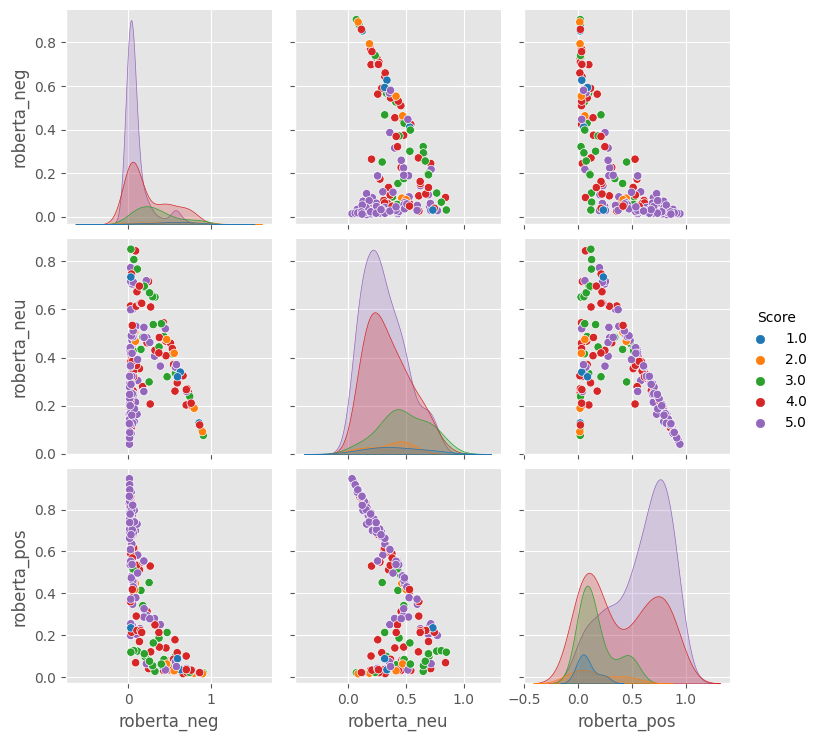

In [35]:
sns.pairplot(data = results_df,
            vars= ['roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue ='Score',
            palette='tab10')
plt.show()